<a href="https://colab.research.google.com/github/davidsadovy/data690_fall2022/blob/main/assignment_06/assignment_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 06
- Date: 10/09/2022
- Name: David Sadovy

## Assignment 06
### Note:
- For visualization, you should use Matplotlib, seaborn, or Plotly Express 
- Use this notebook as your template and follow the instructions

The first half of this assignment is similar to assignment 04.

This gives you a chance to refresh.

The second half is new and gives you a chance to perform additional practices.

You also get a chance to use some of the Python libraries and techniques.

The links to the zip file is:

- https://collegescorecard.ed.gov/data (This web page contains the link to the zip file)

- https://ed-public-download.app.cloud.gov/downloads/CollegeScorecard_Raw_Data_09012022.zip (The link to the zip file)

You can run `!wget` command in Colab notebook to retrieve it directly, then run `!unzip` command to extract files (I have provided the cells to do so next for your convenience)

Your folder structure should look like this in your Colab enviroment:

- ...
- 'MERGED1996_97_PP.csv',
- 'MERGED2015_16_PP.csv',
- ...
- 'MERGED2017_18_PP.csv'
- ...

**Note: you should refresh the folder to see all files.**

## Step 1 - Retrieve the zip file

In [1]:
!wget https://ed-public-download.app.cloud.gov/downloads/CollegeScorecard_Raw_Data_09012022.zip

--2022-10-09 21:43:55--  https://ed-public-download.app.cloud.gov/downloads/CollegeScorecard_Raw_Data_09012022.zip
Resolving ed-public-download.app.cloud.gov (ed-public-download.app.cloud.gov)... 3.30.138.208, 3.30.49.38, 2600:1f12:18a:7d01:ad67:f64c:95d6:78ed, ...
Connecting to ed-public-download.app.cloud.gov (ed-public-download.app.cloud.gov)|3.30.138.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 410294884 (391M) [application/zip]
Saving to: ‘CollegeScorecard_Raw_Data_09012022.zip’

CollegeScorecard_Ra 100%[===================>] 391.29M  17.9MB/s    in 23s     

2022-10-09 21:44:19 (16.9 MB/s) - ‘CollegeScorecard_Raw_Data_09012022.zip’ saved [410294884/410294884]



## Step 2 - Unzip the zip file

In [2]:
!unzip CollegeScorecard_Raw_Data_09012022.zip

Archive:  CollegeScorecard_Raw_Data_09012022.zip
 extracting: Crosswalks.zip          
  inflating: data.yaml               
  inflating: FieldOfStudyData1415_1516_PP.csv  
  inflating: FieldOfStudyData1516_1617_PP.csv  
  inflating: FieldOfStudyData1617_1718_PP.csv  
  inflating: FieldOfStudyData1718_1819_PP.csv  
  inflating: MERGED1996_97_PP.csv    
  inflating: MERGED1997_98_PP.csv    
  inflating: MERGED1998_99_PP.csv    
  inflating: MERGED1999_00_PP.csv    
  inflating: MERGED2000_01_PP.csv    
  inflating: MERGED2001_02_PP.csv    
  inflating: MERGED2002_03_PP.csv    
  inflating: MERGED2003_04_PP.csv    
  inflating: MERGED2004_05_PP.csv    
  inflating: MERGED2005_06_PP.csv    
  inflating: MERGED2006_07_PP.csv    
  inflating: MERGED2007_08_PP.csv    
  inflating: MERGED2008_09_PP.csv    
  inflating: MERGED2009_10_PP.csv    
  inflating: MERGED2010_11_PP.csv    
  inflating: MERGED2011_12_PP.csv    
  inflating: MERGED2012_13_PP.csv    
  inflating: MERGED2013_14_PP.csv    

## Step 3 - Import Libraries

In [74]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

## Step 4 - Display the current working directory using os.getcwd()

You would need to import a standard Python library called os which stands for operating system. so place that import statement in the previous cell. Since your notebook and your data files may or may not in the same folder, you want to make sure what the current working folder is and how to access a data file in a different folder.

In [4]:
os.getcwd()

'/content'

## Step 5 - Get the list of file names

os library has a method call listdir which generates a list of files in a directory/folder. Use this method to assign the contents (list of file names) of the data folder to a variable and display it. If necessary, you can use ../ construct to traverse to the parent folder and then to another foloder parallel to the current folder


In [14]:
name_list = os.listdir()
name_list

['.config',
 'MERGED2006_07_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED1998_99_PP.csv',
 'Crosswalks.zip',
 'MERGED2012_13_PP.csv',
 'MERGED2019_20_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2014_15_PP.csv',
 'Most-Recent-Cohorts-Field-of-Study.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2016_17_PP.csv',
 'FieldOfStudyData1718_1819_PP.csv',
 'MERGED2018_19_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2005_06_PP.csv',
 'FieldOfStudyData1516_1617_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED1996_97_PP.csv',
 'FieldOfStudyData1415_1516_PP.csv',
 '.ipynb_checkpoints',
 'FieldOfStudyData1617_1718_PP.csv',
 'MERGED2017_18_PP.csv',
 'data.yaml',
 'Most-Recent-Cohorts-Institution.csv',
 'MERGED1997_98_PP.csv',
 'MERGED2020_21_PP.csv',
 'CollegeScorecard_Raw_Data_09012022.zip',
 'MERGED2001_02_PP.csv']

## Step 6 - Process only the yearly data files

The folder contains files that are not the yearly data files. Write code to remove the unwanted files from the list variable.

Note: don't remove/delete these files from the folder in the folder.
For example, use the file extension to only use the csv files or use the name pattern - data file name begins with "MERGED". You can use the concept of list comprehension to write just *one* line of code as well as using a for loop, your choice.

In [18]:
# list comprehension with condition
yearly_list = [file_name for file_name in name_list if file_name.startswith("MERGED")]

# sort list in order by year
yearly_list.sort()

# confirm only desired files are kept
yearly_list

['MERGED1996_97_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2018_19_PP.csv',
 'MERGED2019_20_PP.csv',
 'MERGED2020_21_PP.csv']

## Step 7 - Load data files
 
Now that you have a clean list of the yearly files, you want to loop through them and read them into a dataframe one at a time. You only load six columns: ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"].

You should use "usecols" option of Pandas to avoid reading unwanted columns. You also want to add a new column call "YEAR" to differentiate the data frames from each other. The YEAR variable should be yyyy format so tht you can convert them into integer. If you use the format yyyy-yy (such as 1997-98 school year), you will not be able to convert them directly to integer. If you use scatter plot, the YEAR needs to be converted to integer or float. 

You would use an empty list and append the yearly dataframes to the list. After all data files are loaded and appended to the list, you would use Pandas to concatenate them into a new single data frame.

Note: this exercise incorporates many techques we learned before:

- list (creating an empty, append an item to the list)
- for loop 
- read only the needed columns from a file (using usecols option)
- add a new column to a data frame
- concatenate multiple dataframes into a single one

This exercise may appear challenging but it worths the effort. You will learn a lot and love it. I promise.

In [46]:
# build Data Frame using first yearly list as template
# print statement provides visual evidence of progress
print("processing file", yearly_list[0]) 

# specify path to file and required columns to build Data Frame
df_all = pd.read_csv("/content/" + yearly_list[0], usecols=["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"])

# add additional column to Data Frame for year, pull year from file name, change str to int, and add to Data Frame
df_all["YEAR"] = int(yearly_list[0][6:10])

# print statement provides visual evidence of progress
print(df_all.shape)

# for loop processes remaining yearly lists and concatenates all into singe Data Frame
for yearly_file in yearly_list[1:]:

    # print statement provides visual evidence of progress
    print("processing file", yearly_file)

    # specify path to file and required columns to build Data Frame
    df = pd.read_csv("/content/" + yearly_file, usecols=["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"])

    # add additional column to Data Frame for year, pull year from file name, change str to int, and add to Data Frame
    df["YEAR"] = int(yearly_file[6:10])

    # append Data Frame of current year to Data Frame for all years, ignoring index
    df_all = df_all.append(df, ignore_index = True)

    # print statement provides visual evidence of progress
    print(df_all.shape)

processing file MERGED1996_97_PP.csv
(7007, 7)
processing file MERGED1997_98_PP.csv
(13941, 7)
processing file MERGED1998_99_PP.csv
(20643, 7)
processing file MERGED1999_00_PP.csv
(27252, 7)
processing file MERGED2000_01_PP.csv
(33906, 7)
processing file MERGED2001_02_PP.csv
(40631, 7)
processing file MERGED2002_03_PP.csv
(47283, 7)
processing file MERGED2003_04_PP.csv
(53956, 7)
processing file MERGED2004_05_PP.csv
(60703, 7)
processing file MERGED2005_06_PP.csv
(67602, 7)
processing file MERGED2006_07_PP.csv
(74553, 7)
processing file MERGED2007_08_PP.csv
(81524, 7)
processing file MERGED2008_09_PP.csv
(88579, 7)
processing file MERGED2009_10_PP.csv
(95796, 7)
processing file MERGED2010_11_PP.csv
(103266, 7)
processing file MERGED2011_12_PP.csv
(111012, 7)
processing file MERGED2012_13_PP.csv
(118874, 7)
processing file MERGED2013_14_PP.csv
(126743, 7)
processing file MERGED2014_15_PP.csv
(134509, 7)
processing file MERGED2015_16_PP.csv
(142175, 7)
processing file MERGED2016_17_PP.cs

## Step 8 - Explore the new dataframe 

For example, # of observations, varibles, head, tail, sample, missing values, statistics, etc.

In [40]:
# shows number of rows and columns in Data Frame
# number of rows is number of observations
# number of columns is number of variables
df_all.shape

(176707, 7)

In [41]:
# shows names of columns (variables)
list(df_all.columns)

['UNITID', 'INSTNM', 'STABBR', 'REGION', 'ADM_RATE', 'TUITIONFEE_IN', 'YEAR']

In [51]:
# shows first 5 rows of Data Frame
df_all.head()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
0,100636,Community College of the Air Force,AL,0.0,NaN,NaN,1996
1,100654,Alabama A & M University,AL,5.0,NaN,NaN,1996
2,100663,University of Alabama at Birmingham,AL,5.0,NaN,NaN,1996
3,100672,ALABAMA AVIATION AND TECHNICAL COLLEGE,AL,5.0,NaN,NaN,1996
4,100690,Amridge University,AL,5.0,NaN,NaN,1996


In [52]:
# shows last 5 rows of Data Frame
df_all.tail()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
176702,49576719,Pennsylvania State University-Penn State Wilke...,PA,2.0,NaN,13604.0,2020
176703,49576720,Pennsylvania State University-Penn State York,PA,2.0,NaN,14486.0,2020
176704,49576721,Pennsylvania State University-Penn State Great...,PA,2.0,NaN,NaN,2020
176705,49576722,Pennsylvania State University-Penn State Harri...,PA,2.0,NaN,15216.0,2020
176706,49576723,Pennsylvania State University-Penn State Brand...,PA,2.0,NaN,14486.0,2020


In [59]:
# shows random 5 rows of Data Frame
df_all.sample(5)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
62204,154970,Marinello Schools of Beauty-Manhattan,KS,4.0,NaN,NaN,2005
73559,438179,Brookline College-Tucson,AZ,6.0,NaN,10200.0,2006
164518,155292,Kansas City Kansas Community College,KS,4.0,NaN,3120.0,2019
45707,365277,Davis H Hart Mexico Area Vocational Technical ...,MO,4.0,NaN,NaN,2002
132792,451051,Academy of Massage and Bodywork,DE,2.0,NaN,NaN,2014


In [60]:
# shows non-null counts for each column, allowing us to infer the number of null counts (missing values)
# note that "YEAR" is type int, as desired
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176707 entries, 0 to 176706
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   UNITID         176707 non-null  int64  
 1   INSTNM         176707 non-null  object 
 2   STABBR         176707 non-null  object 
 3   REGION         176706 non-null  float64
 4   ADM_RATE       48863 non-null   float64
 5   TUITIONFEE_IN  86867 non-null   float64
 6   YEAR           176707 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 9.4+ MB


In [50]:
# another way to identify missing values
df_all.isnull()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
0,False,False,False,False,True,True,False
1,False,False,False,False,True,True,False
2,False,False,False,False,True,True,False
3,False,False,False,False,True,True,False
4,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...
176702,False,False,False,False,True,False,False
176703,False,False,False,False,True,False,False
176704,False,False,False,False,True,True,False
176705,False,False,False,False,True,False,False


In [49]:
# shows descriptive statistics of numerica columns of Data Frame
df_all.describe()

,UNITID,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
count,1.767070e+05,176706.000000,48863.000000,86867.000000,176707.000000
mean,1.054338e+06,4.559279,0.693785,12037.588290,2008.176750
std,4.959072e+06,2.188341,0.217019,10462.970227,7.133143
min,1.006360e+05,0.000000,0.000000,0.000000,1996.000000
25%,1.641730e+05,3.000000,0.556700,3936.000000,2002.000000
50%,2.136310e+05,5.000000,0.719500,9422.000000,2008.000000
75%,4.137780e+05,6.000000,0.857100,16490.000000,2014.000000
max,4.957672e+07,9.000000,1.000000,74787.000000,2020.000000


## Step 9 - UMBC 

The dataframe contains many years of data of all U.S. colleges. let's just look at UMBC. Filter/query the dataframe to retrieve only rows that belong to UMBC (one row represent one year). Save the UMNC data to a new data frame. using a new variable for the UMBC data frame, so that the old big data frame is still available for later use.

In [63]:
df_UMBC = df_all[df_all["INSTNM"].str.contains("University of Maryland-Baltimore County")]
df_UMBC

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
2151,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996
9056,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997
15923,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998
22598,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999
29178,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000
35821,163268,University of Maryland-Baltimore County,MD,2.0,0.6551,5910.0,2001
42524,163268,University of Maryland-Baltimore County,MD,2.0,0.6327,6362.0,2002
49156,163268,University of Maryland-Baltimore County,MD,2.0,0.5757,7388.0,2003
55786,163268,University of Maryland-Baltimore County,MD,2.0,0.7014,8020.0,2004
62522,163268,University of Maryland-Baltimore County,MD,2.0,0.7143,8520.0,2005


## Step 10 - Explore the new dataframe

For example, # of observations, varibles, head, tail, sample, missing values, statistics, etc

In [66]:
# shows number of rows and columns in Data Frame
# number of rows is number of observations
# number of columns is number of variables
df_UMBC.shape

(25, 7)

In [67]:
# shows names of columns (variables)
list(df_UMBC.columns)

['UNITID', 'INSTNM', 'STABBR', 'REGION', 'ADM_RATE', 'TUITIONFEE_IN', 'YEAR']

In [68]:
# shows first 5 rows of Data Frame
df_UMBC.head()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
2151,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996
9056,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997
15923,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998
22598,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999
29178,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000


In [69]:
# shows last 5 rows of Data Frame
df_UMBC.tail()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
143685,163268,University of Maryland-Baltimore County,MD,2.0,0.5683,11264.0,2016
150891,163268,University of Maryland-Baltimore County,MD,2.0,0.6021,11518.0,2017
157940,163268,University of Maryland-Baltimore County,MD,2.0,0.5794,11778.0,2018
164723,163268,University of Maryland-Baltimore County,MD,2.0,0.6103,12028.0,2019
171401,163268,University of Maryland-Baltimore County,MD,2.0,0.6948,9420.0,2020


In [70]:
# shows random 5 rows of Data Frame
df_UMBC.sample(5)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
62522,163268,University of Maryland-Baltimore County,MD,2.0,0.7143,8520.0,2005
83291,163268,University of Maryland-Baltimore County,MD,2.0,0.7174,8780.0,2008
9056,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997
104960,163268,University of Maryland-Baltimore County,MD,2.0,0.6081,9467.0,2011
97506,163268,University of Maryland-Baltimore County,MD,2.0,0.6589,9171.0,2010


In [71]:
# shows non-null counts for each column, allowing us to infer the number of null counts (missing values)
df_UMBC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 2151 to 171401
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UNITID         25 non-null     int64  
 1   INSTNM         25 non-null     object 
 2   STABBR         25 non-null     object 
 3   REGION         25 non-null     float64
 4   ADM_RATE       20 non-null     float64
 5   TUITIONFEE_IN  21 non-null     float64
 6   YEAR           25 non-null     int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 1.6+ KB


In [72]:
# another way to identify missing values
df_UMBC.isnull()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
2151,False,False,False,False,True,True,False
9056,False,False,False,False,True,True,False
15923,False,False,False,False,True,True,False
22598,False,False,False,False,True,True,False
29178,False,False,False,False,True,False,False
35821,False,False,False,False,False,False,False
42524,False,False,False,False,False,False,False
49156,False,False,False,False,False,False,False
55786,False,False,False,False,False,False,False
62522,False,False,False,False,False,False,False


In [73]:
# shows descriptive statistics of numerica columns of Data Frame
df_UMBC.describe()

,UNITID,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
count,25.0,25.0,20.000000,21.000000,25.000000
mean,163268.0,2.0,0.641880,9168.571429,2008.000000
std,0.0,0.0,0.051853,1854.082079,7.359801
min,163268.0,2.0,0.568300,5490.000000,1996.000000
25%,163268.0,2.0,0.600600,8520.000000,2002.000000
50%,163268.0,2.0,0.632100,9171.000000,2008.000000
75%,163268.0,2.0,0.690825,10384.000000,2014.000000
max,163268.0,2.0,0.717400,12028.000000,2020.000000


## Step 11 - Plot UMBC's in-state tution overtime Bar Chart

Text(0.5, 1.0, 'UMBC IN-STATE TUITION, 2000-2020')

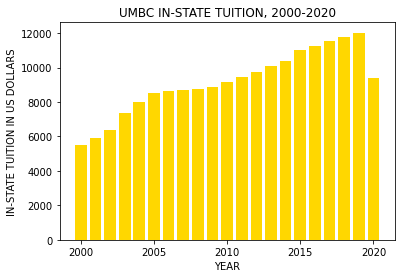

In [92]:
plt.bar(df_UMBC["YEAR"], df_UMBC["TUITIONFEE_IN"], color="gold")
plt.xlabel("YEAR")
plt.ylabel("IN-STATE TUITION IN US DOLLARS")
plt.title("UMBC IN-STATE TUITION, 2000-2020")

## Step 12 - Plot UMBC's in-state tution overtime using line Chart

Text(0.5, 1.0, 'UMBC IN-STATE TUITION, 2000-2020')

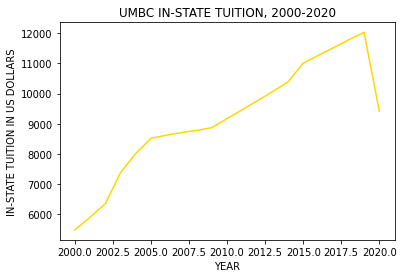

In [94]:
plt.plot(df_UMBC["YEAR"], df_UMBC["TUITIONFEE_IN"], color="gold")
plt.xlabel("YEAR")
plt.ylabel("IN-STATE TUITION IN US DOLLARS")
plt.title("UMBC IN-STATE TUITION, 2000-2020")

## Step 13 - Tuition Growth Rate

Now let's look at the tuition growth rate year over year. We need to calculate UMBC tuition change percentage each year. First convert the TUITIONFEE_IN column to a Python List

In [205]:
# convert column to list
tuition_list = list(df_UMBC["TUITIONFEE_IN"])

print(tuition_list)

[nan, nan, nan, nan, 5490.0, 5910.0, 6362.0, 7388.0, 8020.0, 8520.0, 8622.0, 8708.0, 8780.0, 8872.0, 9171.0, 9467.0, 9764.0, 10068.0, 10384.0, 11006.0, 11264.0, 11518.0, 11778.0, 12028.0, 9420.0]


## Step 14 - Loop through the list and calculate the % change each year over the prior year

This takes some effort. Not hard, just some abstract/logical thinking and some experiments. Have fun on this one.

In [206]:
# initialize empty list to hold year over year percent change
change_list = []

# loop through each year, calculate year over year percent change, and add to list
for i in range(len(tuition_list) - 1):
    change_list.append((tuition_list[i+1] - tuition_list[i]) / tuition_list[i])

print(change_list)

[nan, nan, nan, nan, 0.07650273224043716, 0.07648054145516074, 0.16127004086765168, 0.08554412560909583, 0.06234413965087282, 0.011971830985915493, 0.009974483878450475, 0.008268259072117593, 0.010478359908883827, 0.03370153291253381, 0.03227565151019518, 0.03137213478398648, 0.031134780827529702, 0.03138657131505761, 0.05989984591679507, 0.02344175904052335, 0.022549715909090908, 0.022573363431151242, 0.021226014603498048, -0.2168274027269704]


## Step 15 - Round up the percentage to two decimal points

The resulting number has many decimal points which are unnecessary and not visually appealing. You can use for loop. Or better, use list comprehension for simplicity/brevity.

In [207]:
change_list = [round(change_percent, 2) for change_percent in change_list]

print(change_list)

[nan, nan, nan, nan, 0.08, 0.08, 0.16, 0.09, 0.06, 0.01, 0.01, 0.01, 0.01, 0.03, 0.03, 0.03, 0.03, 0.03, 0.06, 0.02, 0.02, 0.02, 0.02, -0.22]


## Step 16 - Add the list of the percentages to the dataframe as a new column ("PCT_CHANGE")

Not as hard as you may think. If you get stuck, you think too hard. Google it and you will find the answer.

In [208]:
df_UMBC.PCT_CHANGE[1:] = change_list
df_UMBC

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._set_values(indexer, value)


,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR,PCT_CHANGE
2151,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996,NaN
9056,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997,NaN
15923,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998,NaN
22598,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999,NaN
29178,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000,NaN
35821,163268,University of Maryland-Baltimore County,MD,2.0,0.6551,5910.0,2001,0.08
42524,163268,University of Maryland-Baltimore County,MD,2.0,0.6327,6362.0,2002,0.08
49156,163268,University of Maryland-Baltimore County,MD,2.0,0.5757,7388.0,2003,0.16
55786,163268,University of Maryland-Baltimore County,MD,2.0,0.7014,8020.0,2004,0.09
62522,163268,University of Maryland-Baltimore County,MD,2.0,0.7143,8520.0,2005,0.06


## Step 17 - Finaly, we can make the plot tuition growth rate year over year - bar first, then line chart

Text(0.5, 1.0, 'UMBC YEAR OVER YEAR TUITION PERCENT CHANGE, 2000-2020')

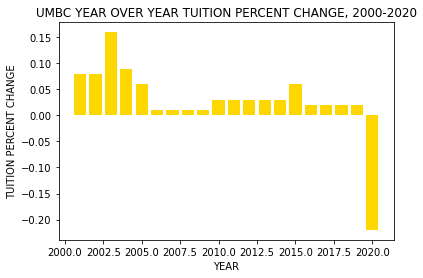

In [209]:
plt.bar((df_UMBC["YEAR"]), df_UMBC["PCT_CHANGE"], color="gold")
plt.xlabel("YEAR")
plt.ylabel("TUITION PERCENT CHANGE")
plt.title("UMBC YEAR OVER YEAR TUITION PERCENT CHANGE, 2000-2020")

Text(0.5, 1.0, 'UMBC YEAR OVER YEAR TUITION PERCENT CHANGE, 2000-2020')

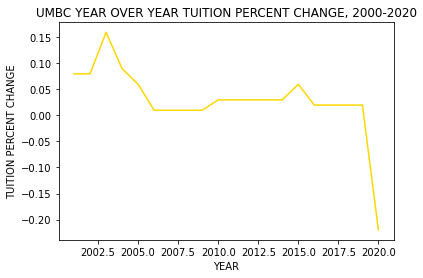

In [211]:
plt.plot((df_UMBC["YEAR"]), df_UMBC["PCT_CHANGE"], color="gold")
plt.xlabel("YEAR")
plt.ylabel("TUITION PERCENT CHANGE")
plt.title("UMBC YEAR OVER YEAR TUITION PERCENT CHANGE, 2000-2020")

## Step 18 - Define Growth Rate Function

Since we want to do the same calculation for JHU. Instead of doing it piecemeal as we did for UMBC. Let's create a function which can be reused for any college. This function takes a list of tuitions and return a list of percentage changes year over year. This function can be used later.

In [212]:
def growth_rate(tuition_list):

    # initialize empty list to hold year over year percent change
    change_list = []

    # loop through each year, calculate year over year percent change, and add to list
    for i in range(len(tuition_list) - 1):
        change_list.append((tuition_list[i+1] - tuition_list[i]) / tuition_list[i])

    # round to 2 decimal places
    change_list = [round(change_percent, 2) for change_percent in change_list]

    return change_list

In [213]:
# test function with UMBC data
print(growth_rate(tuition_list))

[nan, nan, nan, nan, 0.08, 0.08, 0.16, 0.09, 0.06, 0.01, 0.01, 0.01, 0.01, 0.03, 0.03, 0.03, 0.03, 0.03, 0.06, 0.02, 0.02, 0.02, 0.02, -0.22]


## Step 19 - Get JHU Data

The dataframe contains many years of data of all U.S. colleges. Let's just look at JHU. Filter/query the dataframe to retrieve only rows that belong to JHU. Save the JHU data to a new data frame using a new variable so that the old big data frame is still available for later use.

In [214]:
df_JHU = df_all[df_all["INSTNM"].str.contains("Johns Hopkins University")]
df_JHU

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
2139,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1996
9046,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1997
15914,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1998
22589,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1999
29169,162928,Johns Hopkins University,MD,2.0,NaN,24930.0,2000
35812,162928,Johns Hopkins University,MD,2.0,0.3431,26210.0,2001
42515,162928,Johns Hopkins University,MD,2.0,0.3506,27390.0,2002
49148,162928,Johns Hopkins University,MD,2.0,0.3060,28730.0,2003
55779,162928,Johns Hopkins University,MD,2.0,0.3071,30140.0,2004
62515,162928,Johns Hopkins University,MD,2.0,0.3509,31620.0,2005


## Step 20 - Plot JHU's in-state tuition overtime

Let's plot bar and then line chart.

Text(0.5, 1.0, 'JHU IN-STATE TUITION, 2000-2020')

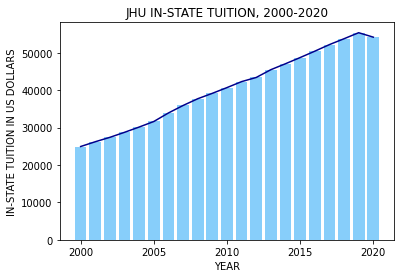

In [215]:
plt.bar(df_JHU["YEAR"], df_JHU["TUITIONFEE_IN"], color="lightskyblue")
plt.plot(df_JHU["YEAR"], df_JHU["TUITIONFEE_IN"], color="darkblue")
plt.xlabel("YEAR")
plt.ylabel("IN-STATE TUITION IN US DOLLARS")
plt.title("JHU IN-STATE TUITION, 2000-2020")

## Step 21 - Calculate Tuition Growth Rate using the Function defined earlier


In [221]:
# convert column to list
tuition_list = list(df_JHU["TUITIONFEE_IN"])

change_list = growth_rate(tuition_list)
print(change_list)

[nan, nan, nan, nan, 0.05, 0.05, 0.05, 0.05, 0.05, 0.07, 0.06, 0.05, 0.04, 0.04, 0.04, 0.03, 0.05, 0.03, 0.04, 0.03, 0.03, 0.03, 0.03, -0.02]


## Step 22 - Add the list of percentage changes to the dataframe as a new column ("PCT_CHANGE")

In [220]:
df_JHU.PCT_CHANGE[1:] = change_list
df_JHU

AttributeError: ignored

## Step 23 - Plot the JHU percentage changes tuitions over time

Bar plot first, then line plot.

In [ ]:
#(Write code here)



## Step 24 - Compare UMBC and JHU 

In order to plot both UMBC and JHU tuition change over time in the same plot, we need to combine the two datasets using the common key of YEAR. 

First make a umbc2 dataframe with only two columns needed. We don't need other columns. Also change the column name from "PCT_CHANGE" to "UMBC_PCT" in preparation for the merge. This is because both umbc and jhu dataframe have the same column name "PCT_CHANGE", we rename them to there is no collision during the merge. BTW, Pandas handles collision gracefully, Feel free to try it without changing the column names.

In [ ]:
#(Write code here)



## Step 25 

Then make a jhu2 dataframe with only two columns needed. WE don't need other columns. Also change the column name from "PCT_CHANGE" to "JHU_PCT"  in preparation for the merge

In [ ]:
#(Write code here)



## Step 26 - Merger the two data frames and display the new dataframe

In [ ]:
#(Write code here)



## Step 27 - Plot UMBC and JHU separately on the same line plot 

In [ ]:
#(Write code here)



## Step 28 - Document your observation of the comparison plots using the following Markdown cell

#### Based on my observation of the plots
#### blah, blah 
#### blah, blah
#### ...
#### blah, blah

In [ ]:
# The end.